In [170]:
import random
import math
from datetime import datetime
import numpy as np
from matplotlib import pyplot as plt

In [171]:
oneChildOp = ["sin", "cos"]
allOp = ["+", '-', '*', '/', 'sin', 'cos']
# allOp = ["+", '-', '*', '/']
randlimit = (-100,100) #generating random num between (1,10) #changeOrder
variable = ['x']

Node Class

In [172]:
random.seed()
class Node:
    """this class has two children
    vars:
        right: Node
        left: Node
        data: char or int
    """
    def __init__(self):
        self._right = None
        self._left = None
        self.data = allOp[random.randint(0, len(allOp) - 1)]
        self._child = None
        self.nodeNum = 1
    def printing(self):
        print(self.data)
    def getChild(self, which):
        """return the child

        Args:
            which (int): which can be 1 or 2 it is bigger than two it works like one

        Returns:
            Node: if input is one func is returned _right
                    if it is two return _left
                    if data can have one child then the return is _child
        """
        if self.data in oneChildOp:
            return self._child
        elif which == 2:
            return self._left
        else:
            return self._right
    def setChild(self, which, input):
        """set to value to childs

        Args:
            which (int): which can be 1 or 2 it is bigger than two it works like one
            input (Node or int or char): your Node or number or variable
        """
        if self.data in oneChildOp:#TODO
            self._child = input
        elif which == 2:
            self._left = input
        else:
            self._right = input

In [173]:
def cal(var1, op, var2):
    if op == '-':
        return var1 - var2
    if op == '*':
        return var1 * var2
    if op == '+':
        return var1 + var2
    if op == '/':
        return var1 / var2

Expr Class

In [174]:
class Expr:
    def __init__(self):
        self.node = Node()
        self.numCount = 0 #save how many number we should generate
        self.opCount = 1
        self.fitness = -1
        self.possibility = 0
        self.num = 0
    def calculator(self, x, head):#TODO if you wanna add more the one var you should change this function
        """calculate the answer of tree

        Args:
            x (int): your input to function
            head (Node): your head

        Returns:
            int or None: answer of function (division by zero return None)
        """
        try:    
            if type(head) == int:
                return head
            elif head == None:
                return None
            elif head == 'x':
                return x
            elif head.data in allOp:
                if head.data in oneChildOp:
                    value = self.calculator(x, head.getChild(1))#TODO if you wanna add more oneChild operator you should change this condition

                    if head.data == "sin":
                        return math.sin(value)
                    elif head.data == "cos":
                        return math.cos(value)
                else:
                    value1 = self.calculator(x, head.getChild(1))
                    value2 = self.calculator(x, head.getChild(2)) 
                    return cal(value1,head.data,value2)
        except (ZeroDivisionError, TypeError, AttributeError):
            return None

    def printTree(self, node):
        """return expresion of tree

        Args:
            node (Node): head node 

        Returns:
            Node : return expression of tree
        """
        if type(node) != Node:
            return node
        elif node.data in oneChildOp:
            return f'{node.data}({self.printTree(node.getChild(1))})'
        elif node.data in allOp:
            return f'({self.printTree(node.getChild(1))} {node.data} {self.printTree(node.getChild(2))})'
        # while True:
    def insertNum(self,headNode ,var):
        """It is for inserting Node 
            = [random.randint(1 , self.numCount - self.opCount )]
        Args:
            headNode (Node): root Node
            tree (Expr): your tree
            var (List): it just use firt value of list (just passby value) 
        """
        random.seed()
        rand = 0
        if rand == 0:
            rand = random.randint(1,2)
        if type(headNode.getChild(rand)) == Node:
            headNode.nodeNum += self.insertNum(headNode.getChild(rand), var)
        elif headNode.getChild(rand) == None and var[0] == 0:
            headNode.setChild(rand,random.randint(randlimit[0],randlimit[1]))
            self.numCount += 1
            headNode.nodeNum +=1
        elif headNode.getChild(rand) == None:
            headNode.setChild(rand,variable[random.randint(0,len(variable) - 1)])
            var[0] -= 1
            self.numCount += 1
            headNode.nodeNum +=1
        if headNode.data in oneChildOp:
            return headNode.nodeNum           
        rand = 2 if rand == 1 else 1 
        if type(headNode.getChild(rand)) == Node:
            headNode.nodeNum += self.insertNum(headNode.getChild(rand), var)
        elif headNode.getChild(rand) == None and var[0] == 0:
            headNode.setChild(rand,random.randint(randlimit[0],randlimit[1]))
            self.numCount += 1
            headNode.nodeNum +=1
        elif headNode.getChild(rand) == None:
            headNode.setChild(rand,variable[random.randint(0,len(variable) - 1)])
            var[0] -= 1
            self.numCount += 1
            headNode.nodeNum +=1
        return headNode.nodeNum 

In [175]:
def insertNode(headNode):
    """inserting new node

    Args:
        headNode (Node): the head of your tree (+,-,*,/)
        inputNode (char): your operator you want to add
    """
    random.seed()
    inputNode = Node()
    # flag = False
    ran = random.randint(1, 2)

    if headNode.getChild(ran) == None:
        headNode.setChild(ran, inputNode)
    elif type(headNode.getChild(ran)) == Node:
        insertNode(headNode.getChild(ran))

In [176]:
def generateTree(count, tree):
    """Generate new cromosome

    Args:
        count (int): tree will have count+1 operator
        tree (Expr): your tree
    """
    tree.opCount = count + 1
    for i in range(count):
        inputNode = Node()
        insertNode(tree.node)
    tree.insertNum(tree.node, [1])#TODO it always in right

In [177]:
instancesNum = 100 #How maney instance you want to test function with it #changeOrder
inputs = []
answers = []
#e.randlimitd

Black Box

In [178]:
def blackBox(inp):
    return math.sin(inp) + math.cos(math.sin(inp))
print(blackBox(4))
random.seed()
for i in range(instancesNum):
    rand = (random.randint(randlimit[0],randlimit[1]))
    inputs.append(rand)
    answers.append(blackBox(rand))

    

-0.029767364139115737


Generate tree

In [179]:
treeNum = 1000 #changeOrder
trees = [] 
random.seed()
for i in range(treeNum):
    trees.append(Expr())
    rand = random.randint(1, 3)
    generateTree(rand, trees[i])#tree'll have hight of between one to 11


Print tree

In [180]:
for i in range(len(trees)):
    print(trees[i].printTree(trees[i].node))

cos((x / -63))
sin((x / sin(36)))
((-4 * x) + (92 * -27))
sin((x - 55))
((-74 - x) - (-64 - 78))
(x / (-60 / sin(-93)))
((43 / x) - -69)
((-92 - -44) + (x / 85))
(sin(x) - (31 + 87))
sin((cos(49) - x))
(8 - cos(x))
((42 * x) - 47)
(sin(x) * (87 / (95 + -99)))
cos(cos(sin(x)))
cos(((50 - -60) * (60 + x)))
cos((x + 36))
cos((x * cos(cos(41))))
(94 / (100 + x))
cos(sin((82 - x)))
((-31 + 83) / (-18 - sin(x)))
sin(((17 / x) - -37))
(sin(-39) + sin(x))
(-46 / (-26 + x))
(sin(x) + 59)
(x / sin(77))
((73 - 41) + (x / (-71 * 63)))
(sin(x) - sin((-80 - -24)))
((38 / (89 / -36)) - x)
cos((x - -22))
(x * (-39 + 59))
(x - (1 * (-71 / 35)))
sin((x / 1))
((-6 - 23) * ((-66 / x) / 5))
cos((-37 + x))
cos(sin(x))
(cos(49) / sin((x / 87)))
(x - (-32 / 43))
(cos(x) - (100 * -20))
(sin(-81) + x)
(cos(x) + (-14 + 6))
cos((-100 / x))
((-6 / 73) / (x + -96))
((cos(x) + 95) + (23 - 100))
cos((x / -32))
sin((x + (-60 * -34)))
(sin((40 / 26)) - (54 + x))
((x + sin(19)) - -87)
((37 + x) / sin(sin(-58)))
(x * ((-

Fitness

In [181]:
def fitness(tree, trees):
    predicted = []
    for i in inputs:
        ans = tree.calculator(i,tree.node)
        if ans == None:
            ans = np.finfo(np.float64).eps
        predicted.append(ans)
    tree.fitness = np.square(np.subtract(answers,predicted)).mean() 


for tree in trees:
    fitness(tree, trees)

Possibility

Random Selection

In [182]:
selectionpossibility = []
def possibilty(trees: list[Expr]): 
    """Calculate possibility of choosing one tree

    Args:
        tree (Expr): your tree which you want calculate
        inputs (List int): input to func
    """
    selectionpossibility.clear()
    for tree in trees:
        if tree.fitness != 0:
            tree.possibility = 1/(tree.fitness + 1)
        else:
            print(f'answer: {tree.printTree(tree.node)}, fitness: {tree.fitness}')
            return True#TODO with fitness of zero genetic function should stop

    sumTree  = sum([tree.possibility for tree in trees])
    for c in trees: selectionpossibility.append(abs(c.possibility/sumTree))
    return False

    
def randomSelection(trees: list[Expr]):
    np.random.seed()
    cho = np.random.choice(len(trees), p= selectionpossibility)
    return trees[ cho ]

copy Node

In [183]:
def copyNode(node):
    newNode = Node()
    if type(node) != Node:
        return node
    elif node.data in oneChildOp:
        newNode._child = copyNode(node.getChild(1))
        newNode.data = node.data
        newNode.nodeNum = node.nodeNum
        return newNode
    elif node.data in allOp:
        newNode._right = copyNode(node.getChild(1))
        newNode._left = copyNode(node.getChild(2))
        newNode.data = node.data
        newNode.nodeNum = node.nodeNum
        return newNode

Crossover

In [184]:

def findNode(node, rand: int, count = [0]):
    """finding a node and returning that [1,rand]

    Args:
        node (Node): head node of tree
        rand (int): this arg should between 2 and size of tree
        count (list, optional): initialize it with [0].Defualt doesn't work properly

    Returns:
        Node: your node
    """
    if type(node) == Node:
        if count[0] == rand - 1:
            return node
        if node.data in oneChildOp:
            count[0]+=1
            temp = findNode(node.getChild(1), rand, count)
            if count[0] == rand - 1:
                return temp
        else:
            count[0] +=1
            temp = findNode(node.getChild(1), rand , count)
            if count[0] == rand - 1:
                return temp
            count[0] += 1
            temp = findNode(node.getChild(2), rand , count)
            if count[0] == rand - 1:
                return temp
    else:
        return node


In [185]:
def setFoundNode(tree: Expr,node: Node,set: Node, rand:int, count = [0]):
    if rand - 1 == 0:
        tree.node = set
        return
    if type(tree.node) != Node:
        tree.node = set
        return 
    elif type(node) == Node:
        changeNumNod = 0
        if count[0] + 1 == rand - 1:
            count[0] += 1
            child = node.getChild(1)
            node.setChild(1,set)
            if type(child) == Node:
                changeNumNod = child.nodeNum
            else: changeNumNod = 1
            if type(set) == Node:
                node.nodeNum += set.nodeNum - changeNumNod
            else:
                node.nodeNum += 1 - changeNumNod
            return changeNumNod
        else:
            count[0] += 1
            changeNumNod = setFoundNode(tree, node.getChild(1), set, rand, count)
            if changeNumNod != 0:
                if type(set) == Node:
                    node.nodeNum += set.nodeNum - changeNumNod
                else:
                    node.nodeNum += 1 - changeNumNod
        if type(node) == Node:
            return changeNumNod
        if count[0] + 1 == rand and 0 == changeNumNod:
            count[0] += 1
            child = node.getChild(1)
            node.setChild(2,set)
            if type(child) == Node:
                changeNumNod = child.nodeNum
            else: changeNumNod = 1
            if type(set) == Node:
                node.nodeNum += set.nodeNum - changeNumNod
            else:
                node.nodeNum += 1 - changeNumNod
            return changeNumNod
        elif 0 == changeNumNod:
            count[0] += 1
            changeNumNod = setFoundNode(tree, node.getChild(2), set, rand, count)
            if changeNumNod != 0:
                if type(set) == Node:
                    node.nodeNum += set.nodeNum - changeNumNod
                else:
                    node.nodeNum += 1 - changeNumNod
        else:
            return changeNumNod
    return 0


for Crossover use this function

In [186]:
def reproduce(tree1: Expr, tree2:Expr):
    newTree1 = Expr()
    newTree2 = Expr()
    newTree1.node = copyNode(tree1.node)
    newTree2.node = copyNode(tree2.node)#TODO set data of Expr to new Expr
    rand1 = 0
    rand2 = 0
    if type(tree1.node) == Node:
        rand1 = random.randint(1, tree1.node.nodeNum)
    else:
        rand1 = 1
    if type(tree2.node) == Node:
        rand2 = random.randint(1, tree2.node.nodeNum)
    else:
        rand2 = 1
    temp1 = Expr()
    temp2 = Expr()
    temp1.node = findNode(newTree2.node,rand2,[0])
    temp2.node = findNode(newTree1.node,rand1,[0])
    setFoundNode(newTree1, newTree1.node,copyNode(findNode(newTree2.node,rand2,[0])),rand1, [0])
    setFoundNode(newTree2, newTree2.node,copyNode(findNode(newTree1.node,rand1,[0])),rand2, [0])
    # return  (newTree1, newTree2)
    return  newTree1

Mutate

In [187]:
def mutate(tree: Expr):
    newTree = Expr()
    newTree.node = copyNode(tree.node)
    # print(tree.node.nodeNum)
    if type(tree.node) == Node:
        rand = random.randint(1,tree.node.nodeNum)
    else:
        rand = 1
    found = findNode(newTree.node, rand, [0])
    if type(found) == Node:
        chooseKind = random.randint(1,3)#1: op, 2: var, 3: num
    else:
        chooseKind = random.randint(2,3)#1: op, 2: var, 3: num
    if chooseKind == 1:
        found.data = allOp[random.randint(0,len(allOp) - 1)]
        if found.data in oneChildOp:
            if found._child == None:
                found._child = found._right
        elif found._right == None:
            found._right = found._child
            found._left = random.randint(randlimit[0],randlimit[1])
    elif chooseKind == 2:
        setFoundNode(newTree, newTree.node, variable[random.randint(0,len(variable) - 1)],rand,[0])
    elif chooseKind == 3:
        setFoundNode(newTree ,newTree.node, random.randint(randlimit[0],randlimit[1]),rand,[0])
    return newTree

In [188]:
def sorting(e):
    return e.fitness

trees.sort(reverse=False, key=sorting)
# for tree in trees:
#     print(tree.fitness)

In [189]:
possibilty(trees)
trees.sort(reverse = False , key = sorting)
for i in trees: 
    print(i.possibility)

0.9223124071199065
0.8996851086739323
0.7128622470958413
0.6977693736632605
0.6785629593504909
0.677865185230669
0.6775062706312291
0.6772244115253607
0.6766748761458151
0.6766748761458151
0.6766748761458151
0.6766748761458151
0.6766748761458151
0.6766748761458151
0.6766748761458151
0.6766748761458151
0.6766748761458151
0.6766748761458151
0.6766748761458151
0.6766748761458151
0.6766748761458151
0.6766748761458151
0.6766748761458151
0.6766748761458151
0.676405704550852
0.6757800689820338
0.6725029401028272
0.6723646067901813
0.6723646067901813
0.6721372885068737
0.6718088074320114
0.6716953648748495
0.6710864222470087
0.6709866930755493
0.6707233902450963
0.6705245643255036
0.6699919774605688
0.6699600261146061
0.6693247466325727
0.6683297062420342
0.6640320736697313
0.6633465134679334
0.6623890009083129
0.6618050709381119
0.6612941233557347
0.66016921613522
0.6598833012329445
0.6579439008515191
0.6572596230942324
0.6569445541376949
0.6567993428754918
0.6557067563162541
0.65570026869847

Genetic Programming

In [190]:
possibilty(trees)
# for tree in trees:
#     print(f'{tree.printTree(tree.node)} fitness: {tree.fitness}')
# print('++++++++++++++++++++++++++++++++++++')
random.seed()
GenerationRange = 20
def genetic(trees):
    amountOfFit = len(trees)
    bestFitnessEveryTime = []
    for _ in range(GenerationRange):#changeOrder
        newTrees = []
        # chooseLastTree = []
        # chooseNewTree = []
        trees.sort(reverse = False , key = sorting)
        print(f'fit: {trees[0].fitness} best possibility: {trees[0].possibility} tree: {trees[0].printTree(trees[0].node)}')
        bestFitnessEveryTime.append(trees[0])
        # print(f'best possibility: {trees[0].possibility}')
        countOfOldTree = (int)(len(trees) * 0.2)
        for i in range(countOfOldTree):
            newTrees.append(trees[i])
        for i in range(len(trees) - countOfOldTree):
            while True:
                x = randomSelection(trees)
                y = randomSelection(trees)
                child = reproduce(x,y)
                rand = random.randint(1,10)#TODO mutate possibility how much
                if rand == 5:
                    child = mutate(child)
                fitness(child, newTrees)
                amountOfFit += 1
                for j in newTrees:
                    if j.fitness == child.fitness:
                        break
                else:
                    newTrees.append(child)
                    break
        trees = newTrees
        if possibilty(trees):
            print('fitness 0 found')
            break
        print(f'gen: {_}____________________________________')
    print(f'fitness count: {amountOfFit}')
    return bestFitnessEveryTime
bestChromosome = genetic(trees)


fit: 0.08423132149190932 best possibility: 0.9223124071199065 tree: (sin(x) - cos((-21 - -44)))
gen: 0____________________________________
fit: 0.08423132149190932 best possibility: 0.9223124071199065 tree: (sin(x) - cos((-21 - -44)))
gen: 1____________________________________
fit: 0.08339528834803041 best possibility: 0.9230241360240802 tree: (cos((cos(x) / x)) + sin(x))
gen: 2____________________________________
fit: 0.027434834248957037 best possibility: 0.9732977378862071 tree: (cos(sin(-18)) + sin(x))
gen: 3____________________________________
fit: 0.027434834248957037 best possibility: 0.9732977378862071 tree: (cos(sin(-18)) + sin(x))
gen: 4____________________________________
fit: 0.027434834248957037 best possibility: 0.9732977378862071 tree: (cos(sin(-18)) + sin(x))
gen: 5____________________________________
fit: 0.02564271845049399 best possibility: 0.9749983907756552 tree: (sin(cos(-13)) + sin(x))
answer: (cos(sin(x)) + sin(x)), fitness: 0.0
fitness 0 found
fitness count: 90

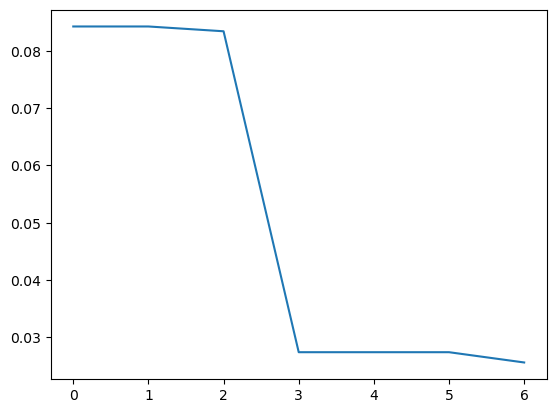

In [191]:
fitList = [i.fitness for i in bestChromosome]
li = [i for i in range(len(fitList))]

plt.plot(li, fitList)
plt.show()